# Small World Networks
##### Gabriel Lima Barros - 2020006531
##### Gabriel Teixeira Carvalho - 2020006558
##### Thiago Pádua de Carvalho - 2020007066

### Introdução
Nesta atividade será desenvolvido um modelo de redes de mundo pequeno, as quais são redes que possuem uma alta densidade de conexões entre os nós, e um baixo caminho médio entre eles. São redes sociais, econômicas ou de outros tipos, em que a maioria dos nós (indivíduos ou entidades) estão interconectados através de um número relativamente pequeno de ligações. Representaremos aqui um small world network através de um grafo, em que os nós são os indivíduos e as arestas são as conexões entre eles.

In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def shortcuts_num(p, N, Z):
    return int(p * N * Z/2)

In [3]:
def build_small_world_network(N, Z, p):
    G = nx.Graph()
    for i in range(N):
        for j in range(i+1, i + int(Z/2) + 1):
            G.add_edge(i, j % N)
    
    atalhos = shortcuts_num(p, N, Z)
    
    for i in range(atalhos):
        n1, n2 = np.random.choice(N, size=2, replace=False)
        G.add_edge(n1, n2)
    
    return G

In [4]:
def FindPathLengthsFromNode(graph, node):
    """Finds the path lengths from a given node to all other nodes in a graph."""
    path_length = nx.single_source_shortest_path_length(graph, node)
    return path_length

In [5]:
def FindAllPathLengths(graph):
    """Finds the path lengths from all nodes to all other nodes in a graph."""
    path_lengths = {}
    for node in graph.nodes():
        path_lengths[node] = FindPathLengthsFromNode(graph, node)
    return path_lengths

In [6]:
def FindAveragePathLengths(graph):
    """Finds the average path length of a graph."""
    path_lengths = FindAllPathLengths(graph)
    total = 0
    for node in path_lengths:
        for path in path_lengths[node]:
            total += path_lengths[node][path]
    return total / (graph.number_of_nodes() * (graph.number_of_nodes() - 1))

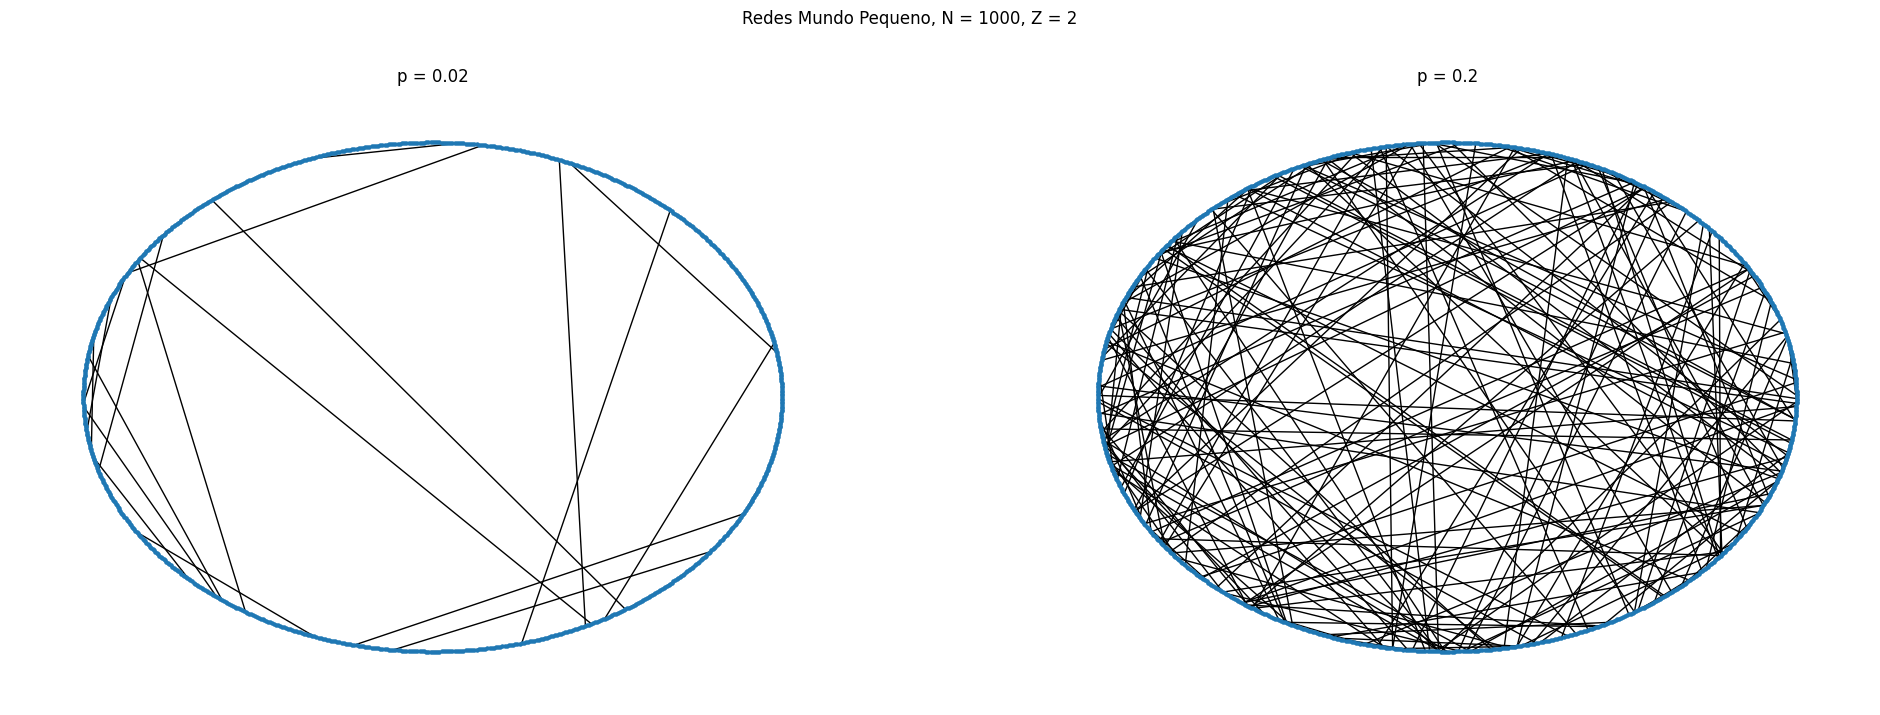

In [7]:
graph = build_small_world_network(1000, 2, 0.02)
graph2 = build_small_world_network(1000, 2, 0.2)

fig, axes = plt.subplots(1, 2, figsize=(24, 8))

nx.draw_circular(graph, node_size=5, ax = axes[0])
nx.draw_circular(graph2, node_size=5, ax = axes[1])

axes[0].set_title("p = 0.02")
axes[1].set_title("p = 0.2")

plt.suptitle("Redes Mundo Pequeno, N = 1000, Z = 2")
plt.show()

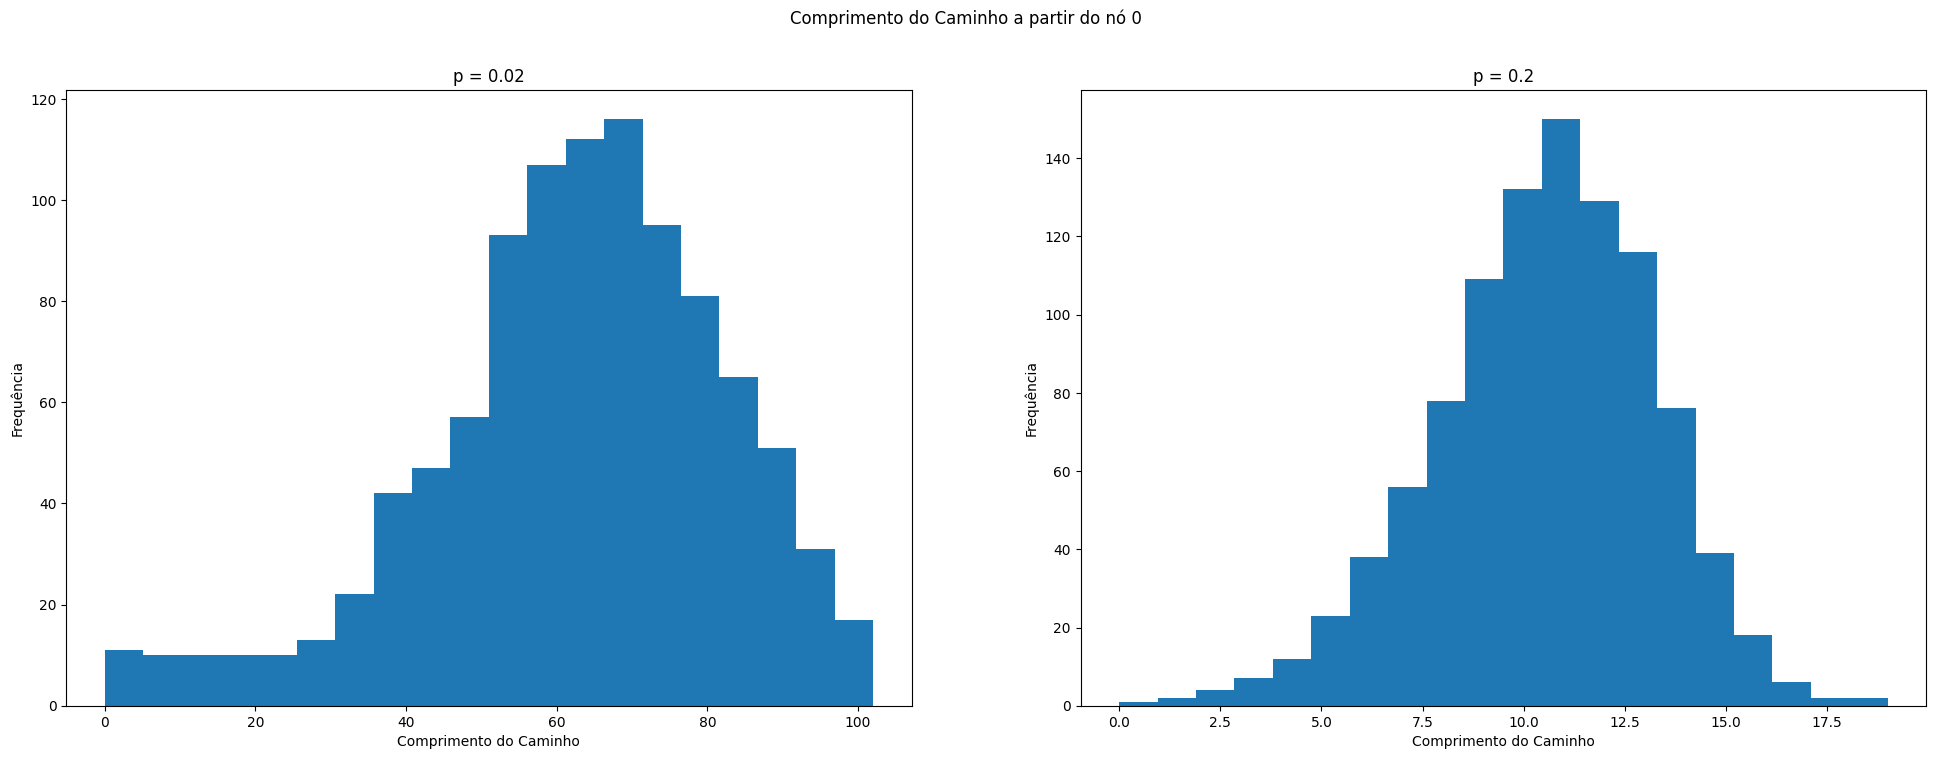

In [8]:
lengths = FindAllPathLengths(graph)
lengths2 = FindAllPathLengths(graph2)

fig, axes = plt.subplots(1, 2, figsize=(24, 8))

axes[0].hist(lengths[0].values(), bins=20)

axes[1].hist(lengths2[0].values(), bins=20)

axes[0].set_title("p = 0.02")
axes[0].set_xlabel("Comprimento do Caminho")
axes[0].set_ylabel("Frequência")

axes[1].set_title("p = 0.2")
axes[1].set_xlabel("Comprimento do Caminho")
axes[1].set_ylabel("Frequência")

plt.suptitle("Comprimento do Caminho a partir do nó 0")

plt.show()

É notável que com o aumento do parâmetro p, o comprimento médio do caminho diminui, já que o número de arestas longas aumenta e um nó tem mais chances de estar conectado a um nó que está longe. Para satisfazer a propriedade "seis graus de separação", o comprimento máximo do caminho deve ser menor ou igual a 6. Com N = 1000 e Z = 2, essa propriedade é satisfeita para p = 2.

Distância média:  9.77588888888889


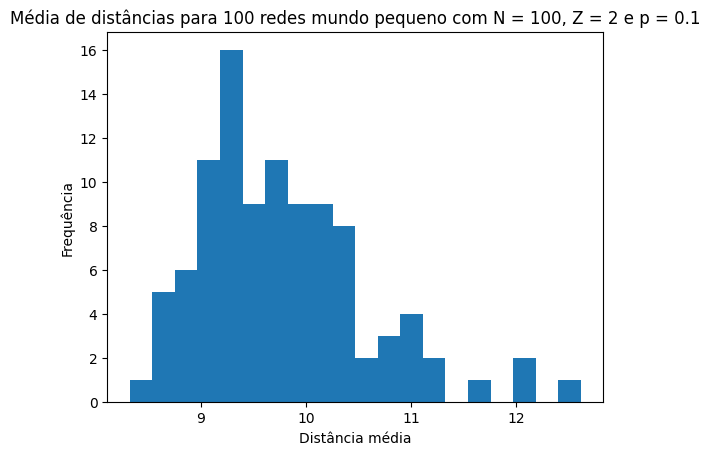

In [9]:
values = []
for i in range(0, 100):
    graph = build_small_world_network(100, 2, 0.1)
    values.append(FindAveragePathLengths(graph))
print("Distância média: ", np.mean(values))
plt.hist(values, bins=20)
plt.title("Média de distâncias para 100 redes mundo pequeno com N = 100, Z = 2 e p = 0.1")
plt.xlabel("Distância média")
plt.ylabel("Frequência")
plt.show()

Existem aproximadamente N * p * Z / 2 = 100 * 0.1 * 2 / 2 = 10 arestas longas neste sistema. Flutuações nas distâncias são esperadas pois a probabilidade de um nó estar conectado a um nó distante é p, e o número de arestas longas é uma variável aleatória. Portanto, pode acontecer de uma aresta longa conectar-se a nós distantes ou próximos, ou até mesmo conectar-se a um nó que já possui uma aresta longa ou ao próprio nó.



In [10]:
# Parte c
p_values = np.logspace(-3, 3, 100)
mean_path_lengths = []
grapho_p0 = build_small_world_network(50, 2, 0)
d_p0 = FindAllPathLengths(grapho_p0)
d_p0_mean = np.mean(FindAveragePathLengths(grapho_p0))
for i in p_values:
    graph = build_small_world_network(50, 2, i)
    mean_path_lengths.append(np.mean(FindAveragePathLengths(graph)/d_p0_mean))

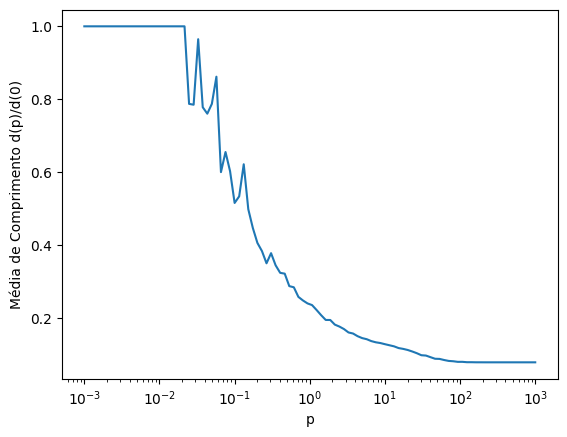

In [11]:
plt.semilogx(p_values, mean_path_lengths)
plt.ylabel('Média de Comprimento d(p)/d(0)')
plt.xlabel('p')
plt.show()

### Por que o gráfico é fixado em 1 para p pequeno?
O gráfico é fixado em 1 para p pequeno pois, o caminho médio é muito próximo do caminho médio de um grafo regular. Com a probabilidade baixa de rewire, a rede se mantém muito próxima de um grafo regular, e portanto o caminho médio se mantém próximo de 1.

In [12]:
graphd = build_small_world_network(50, 2, 0.1)
wat_str_01 = nx.watts_strogatz_graph(1000, 10, 0.1)
wat_str_0001 = nx.watts_strogatz_graph(1000, 10, 0.001)

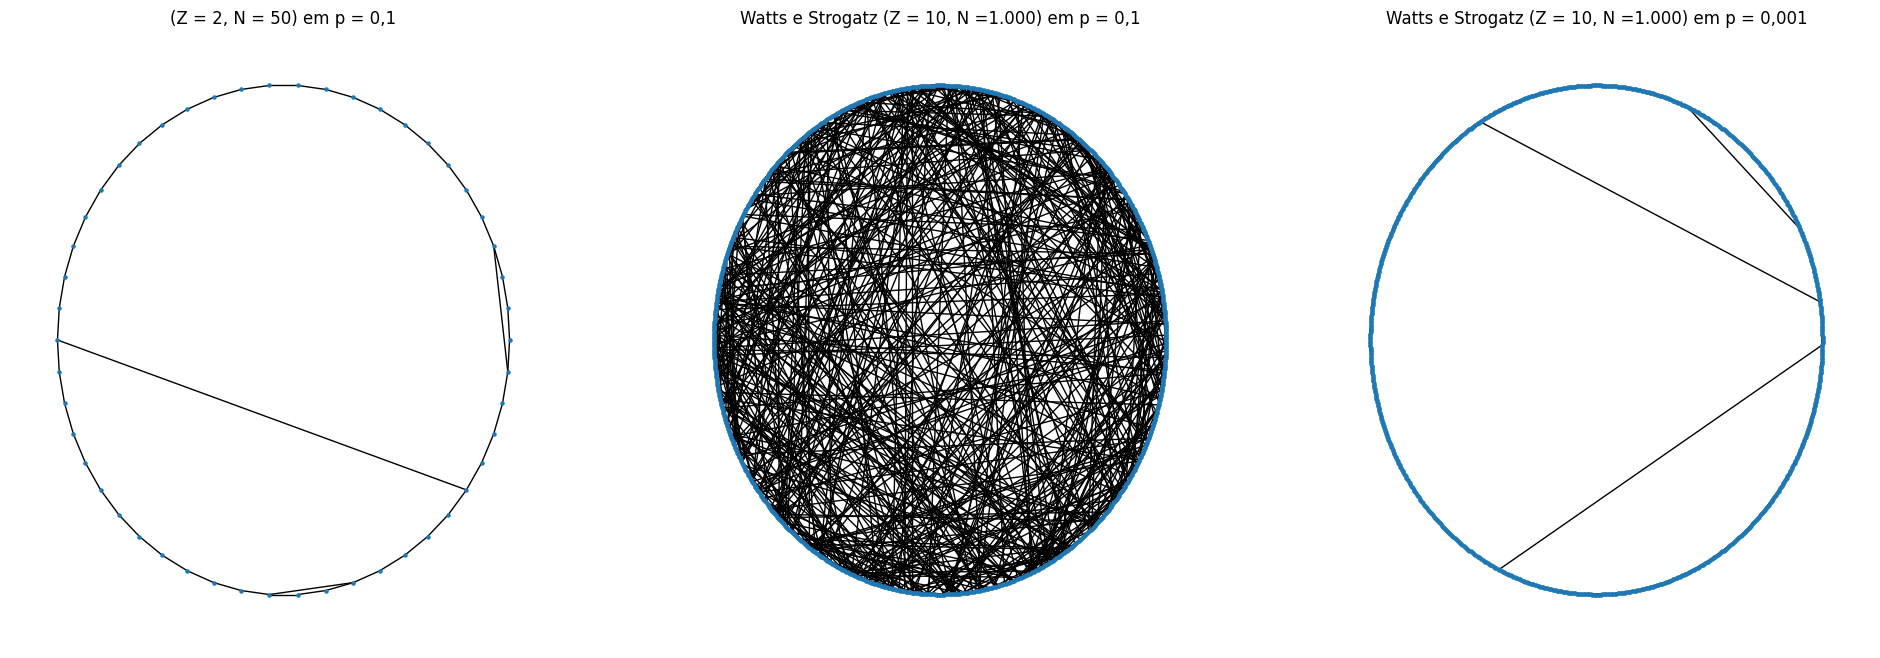

In [13]:
# Plotagem dos gráficos
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

nx.draw_circular(graphd, node_size=5, ax = axes[0])
nx.draw_circular(wat_str_01, node_size=5, ax = axes[1])
nx.draw_circular(wat_str_0001, node_size=5, ax = axes[2])

axes[0].set_title('(Z = 2, N = 50) em p = 0,1')
axes[1].set_title('Watts e Strogatz (Z = 10, N =1.000) em p = 0,1')
axes[2].set_title('Watts e Strogatz (Z = 10, N =1.000) em p = 0,001')

plt.show()

O primeiro e o terceiro sistemas são estatisticamente semelhantes.

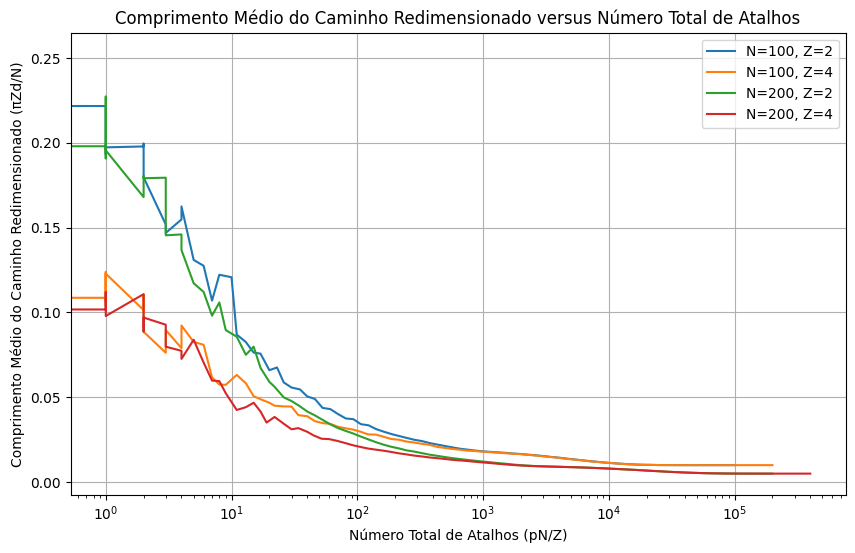

In [14]:
N_values = [100, 200]
Z_values = [2, 4]

# Função para calcular o comprimento médio do caminho redimensionado
def average_path_length_rescaled(N, Z, p):
    G = build_small_world_network(N, Z, p)
    return nx.average_shortest_path_length(G) / N

plt.figure(figsize=(10, 6))

for N in N_values:
    for Z in Z_values:
        avg_path_lengths = [average_path_length_rescaled(N, Z, p) for p in p_values]
        shortcuts = [shortcuts_num(p, N, Z) for p in p_values]
        plt.plot(shortcuts, avg_path_lengths, label=f'N={N}, Z={Z}')
        
plt.xscale('log')
plt.xlabel('Número Total de Atalhos (pN/Z)')
plt.ylabel('Comprimento Médio do Caminho Redimensionado (πZd/N)')
plt.title('Comprimento Médio do Caminho Redimensionado versus Número Total de Atalhos')
plt.legend()
plt.grid(True)

plt.show()

### Parte e
Uma rede de contatos humanos em que os nós representam humanos e as arestas entre eles representam proximidade (i.e., contatos no mundo físico).

Distância média:  1.641632077688151


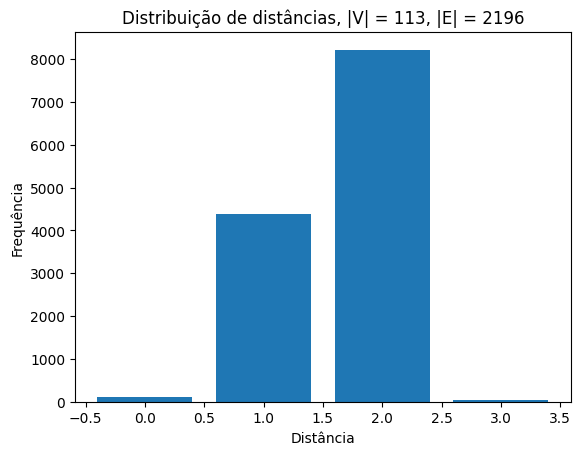

In [15]:
G = nx.read_adjlist('./Data/infect-hyper.edges')

distances = nx.floyd_warshall_numpy(G)
dist_mean = np.mean(distances)
print("Distância média: ", dist_mean)

unique, counts = np.unique(distances, return_counts=True)
plt.title("Distribuição de distâncias, |V| = " + str(G.number_of_nodes()) + ", |E| = " + str(G.number_of_edges()))
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.bar(unique, counts)
plt.show()

Esse conjunto de dados foi coletado por Davis e colegas na década de 1930. Ele contém a frequência observada em 14 eventos sociais por 18 mulheres do sul dos EUA.

Distância média:  1.962809917355372


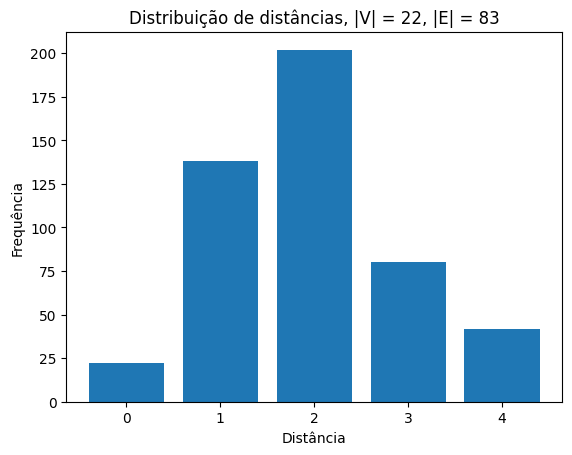

In [16]:
G = nx.read_adjlist('./Data/ia-southernwomen.edges')

distances = nx.floyd_warshall_numpy(G)
dist_mean = np.mean(distances)
print("Distância média: ", dist_mean)

unique, counts = np.unique(distances, return_counts=True)
plt.title("Distribuição de distâncias, |V| = " + str(G.number_of_nodes()) + ", |E| = " + str(G.number_of_edges()))
plt.xlabel("Distância")
plt.ylabel("Frequência")
plt.bar(unique, counts)
plt.show()